In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d

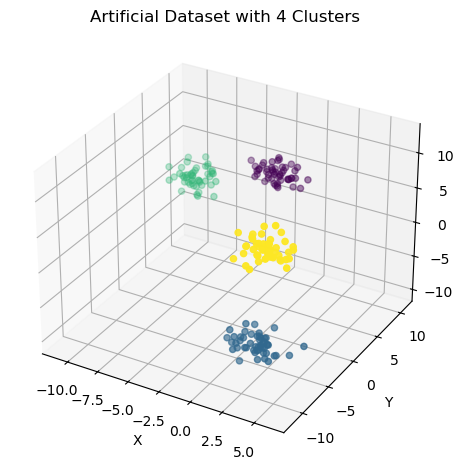

In [ ]:
# Data is generated using the sklearn datasets make_blobs function.
X, y = make_blobs(n_samples=200, n_features=3, centers = 4, random_state=42)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();

In [4]:
# Instantiate a DBSCAN object and cluster data
predictions =  DBSCAN().fit(X).labels_

predictions

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# Examining the predicted labels
unique_labels = np.unique(predictions)
unique_labels

# Here, the predictions of the DBSCAN algorithm don't seem to be very good. 
# All data points are considered as outliers, i.e -1
# This is due to you using an inappropriate value for the eps attribute. 
# The default value is eps = 0.5, and this is used to determine the density of a cluster. 
# Our points are seperated by larger distances, so we should increase eps to a larger value in hopes 
# of getting a better performing clustering.

array([-1])

In [6]:
# Instantiate and fit a DBSCAN clusterer with argument eps equal to 2.0
dbscan_eps_2 = DBSCAN(eps = 2.0).fit(X)
predictions_eps_2 = dbscan_eps_2.labels_
unique_labels_eps_2 = np.unique(predictions_eps_2)

unique_labels_eps_2

array([-1,  0,  1,  2,  3])

In [8]:
# Number of outliers
unique_labels, counts = np.unique(predictions_eps_2, return_counts = True)
print(f"Number of outliers= {counts[0]}")
counts

Number of outliers= 2


array([ 2, 50, 50, 48, 50])

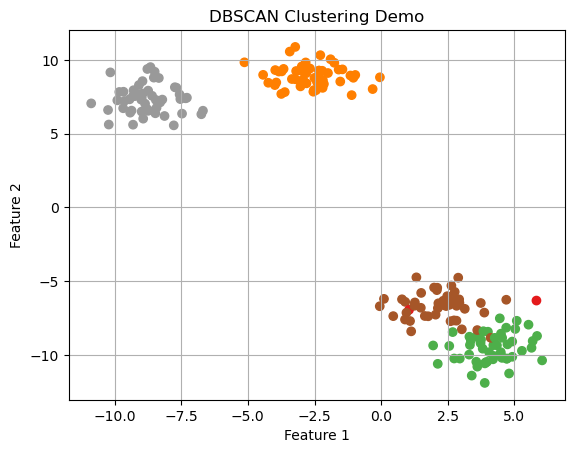

In [11]:
# Plot clusters (outliers marked as -1)
plt.scatter(X[:,0], X[:,1], c=predictions_eps_2, cmap='Set1')
plt.title('DBSCAN Clustering Demo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

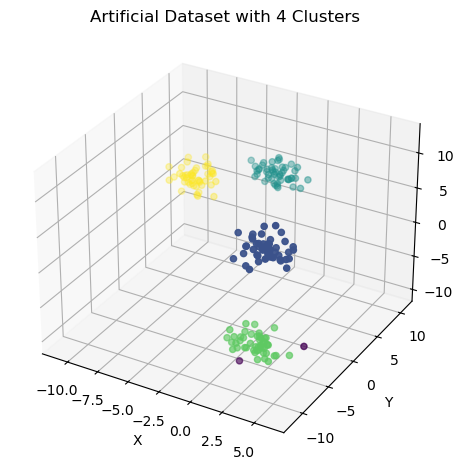

In [12]:
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = predictions_eps_2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();